# DS577 Final Project - Hadoop Results Loading

**Note** Please be advised that the results were running on clusters. Some additional configurations may be needed when you reproduce the results locally.

**Acknowlegments** Thanks for the computing resources from Department of Computer Science, Rutgers University.

In [2]:
import json
import pandas as pd

## Top Hashtags

### Bitcoin

In [16]:
data = pd.read_csv('out/bitcoin-output/part-00000', sep=' ', header=None)
data.sort_values(by=1,ascending=False).head(10)

,0,1
1402,IoT,8064
2821,bitcoin,7379
737,Crypto,7188
1317,ICO,6827
2304,ThingCoin,6511
356,Bitcoin,5710
470,BlockChain,4144
95,Agile,3771
889,DevOps,2887
2397,UX,2776


### Thanksgiving

In [85]:
data = pd.read_csv('out/thanksgiving-hashtags/part-00000', sep=' ', header=None)
data.sort_values(by=1,ascending=False).head(10)

,0,1
7310,Thanksgiving,17122
15364,thanksgiving,2588
7377,ThanksgivingWeek,869
7250,ThankUNext,834
484,Arianators,832
6965,SweetenerWorldTour,832
1266,Camilizers,830
7251,ThankUNextChallenge,830
3355,HappyThanksgiving,597
7575,ThisIsUs,493


## Top URLs

### Bitcoin

In [82]:
urls = pd.read_csv('out/bitcoin-url/part-00000', sep=' ', header=None)
urls.sort_values(by=2,ascending=False).head(10)

,0,1,2
9573,https://t.co/NHZPFXjUAT,https://aerotrips.com/shop,253
14655,https://t.co/ZxiXQ1otbZ,http://discord.gg/SBM97UK,144
19803,https://t.co/mTYFIUHzyn,https://link.medium.com/CHR09k8AXR,98
23451,https://t.co/vGYRBQQHmJ,http://t.me/queen_signalsss,80
12340,https://t.co/UEQpkhEmyP,https://twitter.com/fredCwam/status/1065171503...,79
25040,https://t.co/z5qQl5yshR,http://catex.io,78
138,https://t.co/0K2M3aPaqK,https://twitter.com/f4izalhassan/status/106450...,72
14842,https://t.co/aNzSa7iXS5,https://www.cryptohedgef.com/,71
4706,https://t.co/BQMFrJ8FQQ,https://twitter.com/newsycombinator/status/105...,68
6953,https://t.co/GxjCOsr6PR,http://youtu.be/e_9QouZWUvc,67


### Thanksgiving

In [83]:
urls = pd.read_csv('out/thanksgiving-url/part-00000', sep=' ', header=None)
urls.sort_values(by=2,ascending=False).head(10)

,0,1,2
12043,https://t.co/BPbOJ4l42p,https://twitter.com/iilcollegegirl/status/1064...,5287
52707,https://t.co/oRtOxbdQVO,https://twitter.com/joshscampbell/status/10649...,2360
26553,https://t.co/PFsJ2mnGKi,http://ABCNews.com/live,1362
25137,https://t.co/Nsl3pT2sQ9,https://twitter.com/vidcon/status/106454558479...,747
64953,https://t.co/zwSKByv3Hm,https://twitter.com/kylegriffin1/status/106498...,688
28771,https://t.co/ROFcbZN3Qy,https://twitter.com/mikeseidel/status/10648878...,688
37951,https://t.co/aGcMnIzb1W,https://twitter.com/darrenrovell/status/106506...,473
47684,https://t.co/jaQwhF40QF,https://twitter.com/mommmasaid/status/10628705...,465
49824,https://t.co/ldey1SFhnh,https://twitter.com/VidCon/status/106454558479...,369
35642,https://t.co/Y0MtG0bxyI,https://www.amazon.com/dp/B07GNPN629,241


## Top Significant words

In [76]:
# Process stopwords
from wordcloud import WordCloud, STOPWORDS 
stopword = set()
stopword.update(list(string.punctuation))
stopword.update(list(string.ascii_lowercase))
stopword.update(list(string.ascii_uppercase))
stopword.update(list(string.digits))
stopword.update(STOPWORDS)

### Bitcoin

In [101]:
# Top significant word results
table = pd.read_csv('out/bitcoin-top-word/part-00000', sep=' ', header=None, quoting=3)
table.loc[~table[0].str.lower().isin(stopword),:].sort_values(1, ascending=False).head(10)

,0,1
21800,RT,28204
9106,Bitcoin,22796
29516,bitcoin,10906
11605,Crypto,8712
16695,IoT,8114
16106,ICO,7044
24777,ThingCoin,6511
25645,UserExperienceU,6204
9565,BlockChain,3803
8432,BTC,3751


In [123]:
text_bitcoin = ''
sorted_table = table.loc[~table[0].str.lower().isin(stopword),:].sort_values(1, ascending=False).head(50)
for word in sorted_table[0]:
    text_bitcoin = text_bitcoin + str(word) + ' '

### Thanksgiving

In [126]:
# Top significant word results
table = pd.read_csv('out/thanksgiving-top-word/part-00000', sep=' ', header=None, quoting=3)
table.loc[~table[0].str.lower().isin(stopword),:].sort_values(1, ascending=False).head(10)

,0,1
63482,RT,202294
76018,Thanksgiving,158449
227854,thanksgiving,60299
35258,Happy,19043
79611,Trump,18157
102436,days,18062
242486,の,17580
237156,year,17298
235788,will,16145
108855,family,15372


## Word Cloud

In [127]:
text_thanksgiving = ''
sorted_table = table.loc[~table[0].str.lower().isin(stopword),:].sort_values(1, ascending=False).head(50)
for word in sorted_table[0]:
    text_thanksgiving = text_thanksgiving + str(word) + ' '

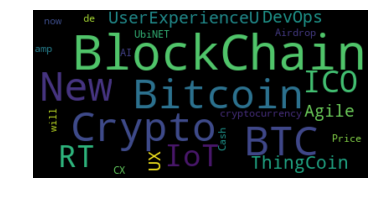

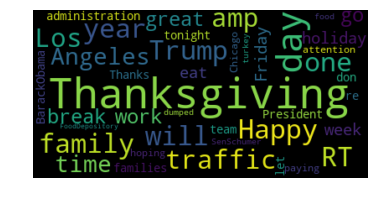

In [131]:
# Generate a word cloud image
wordcloud_bitcoin = WordCloud().generate(text_bitcoin)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud_bitcoin, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud_thanksgiving = WordCloud().generate(text_thanksgiving)
plt.figure()
plt.imshow(wordcloud_thanksgiving, interpolation="bilinear")
plt.axis("off")
plt.show()

&copy; 2018, Tai Yang, Ruixuan Song